In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pickle import load
import os
import pandas as pd
import datetime

from eoles.write_output import comparison_simulations, plot_typical_week, plot_typical_demand
from project.write_output import plot_compare_scenarios

# New runs

In [5]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Uniform": os.path.join("eoles/outputs/0828_S3_N1/0826_225609_uniform_S3_N1"),
               "Uniform 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_004316_uniform_S3_N1_2y"),
               # "No subsidy heater": os.path.join("eoles/outputs/0429_080811_no_subsidy_heater_greenfield"),
               # "No subsidy insulation": os.path.join("eoles/outputs/0429_083155_no_subsidy_insulation_greenfield"),
               "Deep renovation": os.path.join("eoles/outputs/0828_S3_N1/0826_230609_GR_S3_N1"),
               "Deep renovation 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_005742_GR_S3_N1_2y"),
               # "Global renovation low income": os.path.join("eoles/outputs/0504_greenfield_S3_N1/0505_085156_GR_low_income_greenfield_S3_N1"),
               # "Global renovation \n FGE": os.path.join("eoles/outputs/0510_S3_N1/0509_223231_GR_fge_S3_N1"),
               # "MWh_tCO2": os.path.join("eoles/outputs/0510_S3_N1/0509_221317_MWh_tCO2_S3_N1"),
               # "Proportional": os.path.join("eoles/outputs/0510_S3_N1/0511_035113_MWh_insulation_S3_N1"),
               "Insulation technical \n optimum": os.path.join("eoles/outputs/0828_S3_N1/0826_154702_centralized_insulation_S3_N1"),
               "Insulation technical \n optimum 2y": os.path.join("eoles/outputs/0828_S3_N1/0827_154945_centralized_insulation_S3_N1_2y"),
               # "MWh": os.path.join("eoles/outputs/0506_greenfield_S3_N1/0509_130427_MWh_insulation_greenfield_S3_N1"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0905_S3_N1")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform", greenfield=True, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=True)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [8]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {# "Uniform": os.path.join("eoles/outputs/0828_S3_N1/0826_225609_uniform_S3_N1"),
               "Uniform 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_004316_uniform_S3_N1_2y"),
               # "No subsidy heater": os.path.join("eoles/outputs/0429_080811_no_subsidy_heater_greenfield"),
               # "No subsidy insulation": os.path.join("eoles/outputs/0429_083155_no_subsidy_insulation_greenfield"),
               # "Deep renovation": os.path.join("eoles/outputs/0828_S3_N1/0826_230609_GR_S3_N1"),
               "Deep renovation 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_005742_GR_S3_N1_2y"),
               # "Global renovation low income": os.path.join("eoles/outputs/0504_greenfield_S3_N1/0505_085156_GR_low_income_greenfield_S3_N1"),
               # "Global renovation \n FGE": os.path.join("eoles/outputs/0510_S3_N1/0509_223231_GR_fge_S3_N1"),
               # "MWh_tCO2": os.path.join("eoles/outputs/0510_S3_N1/0509_221317_MWh_tCO2_S3_N1"),
               # "Proportional": os.path.join("eoles/outputs/0510_S3_N1/0511_035113_MWh_insulation_S3_N1"),
               # "Insulation technical \n optimum": os.path.join("eoles/outputs/0828_S3_N1/0826_154702_centralized_insulation_S3_N1"),
               "Insulation technical \n optimum 2y": os.path.join("eoles/outputs/0828_S3_N1/0827_154945_centralized_insulation_S3_N1_2y"),
               # "MWh": os.path.join("eoles/outputs/0506_greenfield_S3_N1/0509_130427_MWh_insulation_greenfield_S3_N1"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0905_S3_N1_2y")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform 2y", greenfield=True, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=True)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform 2y")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

# Exogenous Res-IRF policies

ZeroDivisionError: float division by zero

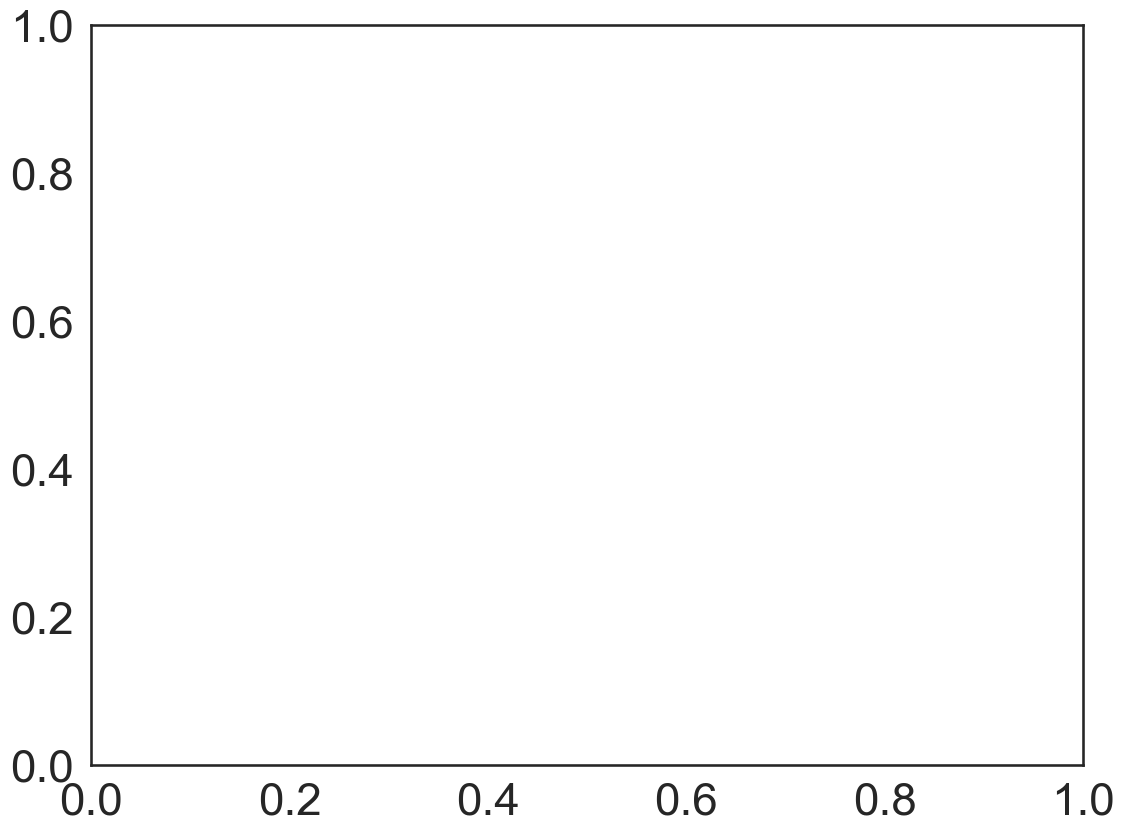

In [13]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Reference": os.path.join("eoles/outputs/0908_185232_uniform_S3_N1_ref"),
               "Restriction gas N1": os.path.join("eoles/outputs/0908_185334_uniform_S3_N1_restrictiongas"),
               "Restriction gas N1nuc": os.path.join("eoles/outputs/0908_192958_uniform_S3_N1nuc_restrictiongas"),
               "Restriction gas Opt": os.path.join("eoles/outputs/0908_193029_uniform_S3_Opt_restrictiongas")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0908_resirf_exogenous")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Reference")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

ZeroDivisionError: float division by zero

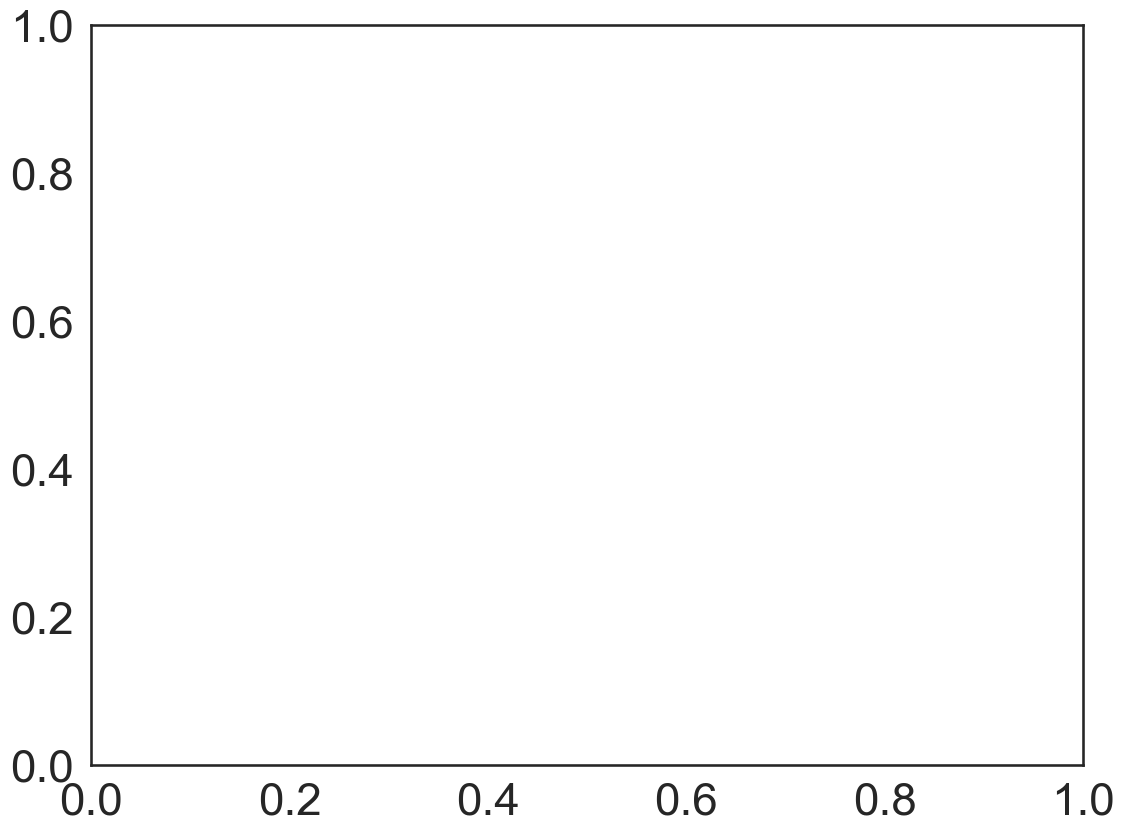

In [15]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
               "Restriction gas N1": os.path.join("eoles/outputs/0908_195504_uniform_S3_N1_restrictiongas_cc"),
               "Restriction gas N1nuc": os.path.join("eoles/outputs/0908_195621_uniform_S3_N1nuc_restrictiongas_cc"),
               "Restriction gas Opt": os.path.join("eoles/outputs/0908_195647_uniform_S3_Opt_restrictiongas_cc")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0908_resirf_exogenous_cc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Restriction gas N1", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Restriction gas N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

# New version ResIRF

In [20]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Uniform": os.path.join("eoles/outputs/0910_S3_N1/0910_191912_uniform_S3_N1"),
               # "Deep renovation": os.path.join("eoles/outputs/0910_S3_N1/0910_192231_GR_S3_N1"),
               "Insulation technical \n optimum": os.path.join("eoles/outputs/0910_S3_N1/0910_122544_centralized_insulation_S3_N1")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0910_S3_N1")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [ ]:
sns.set_theme(context="talk", style="white")
hourly_generation = pd.read_csv("eoles/outputs/0910_S3_N1/0910_191912_uniform_S3_N1/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 1, 29, 0, 0), datetime.datetime(2006, 2, 6, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False)

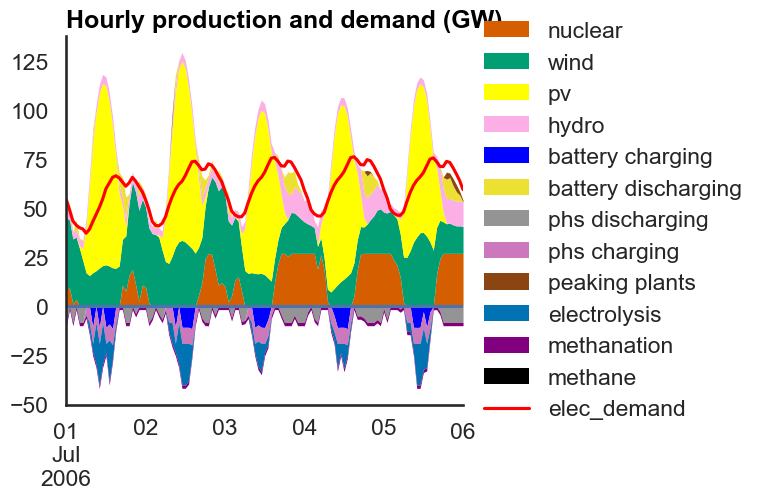

In [20]:
date_start, date_end = datetime.datetime(2006, 7, 1, 0, 0), datetime.datetime(2006, 7, 6, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None)

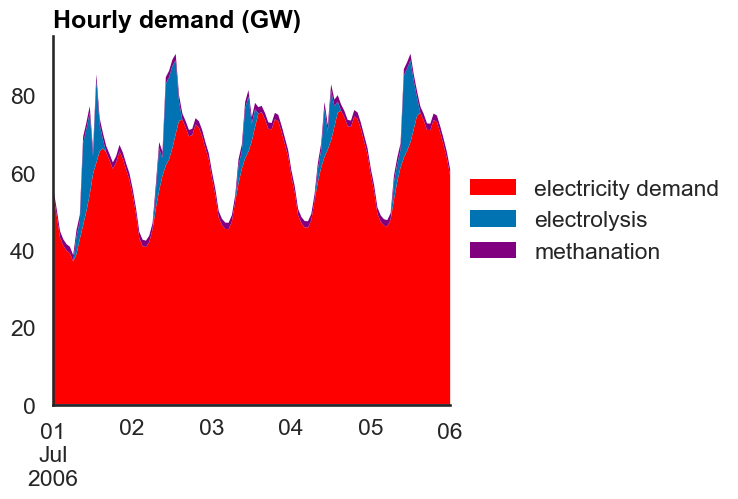

In [9]:
date_start, date_end = datetime.datetime(2006, 7, 1, 0, 0), datetime.datetime(2006, 7, 6, 0, 0)
plot_typical_demand(hourly_generation, date_start, date_end, climate, save_path=None)